<a href="https://colab.research.google.com/github/Darshijain14/oibsip_taskno3/blob/main/CarPrice_prediction_using_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **Project Title** - Car price prediction using machine learning

**Name** - Darshi Jain  
**Project Type** - EDA  
**Industry** - Oasis Infobyte  
**Task** - 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Darshijain14/oibsip_taskno3/refs/heads/main/car%20data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isna().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [8]:
df['Age'] = 2020 - df['Year']

In [9]:
df.drop('Year',axis=1,inplace = True)

In [10]:
column_updates = {'Selling_Price': 'Price_Sold_Lakhs','Present_Price': 'Current_Price_Lakhs','Owner': 'Previous_Owners'}
df.rename(columns=column_updates, inplace=True)

### **EDA**

In [11]:
df.columns

Index(['Car_Name', 'Price_Sold_Lakhs', 'Current_Price_Lakhs', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Previous_Owners', 'Age'],
      dtype='object')

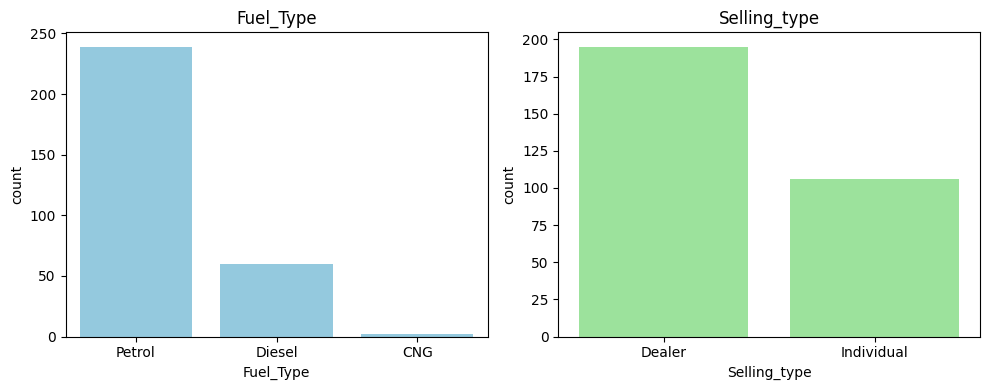

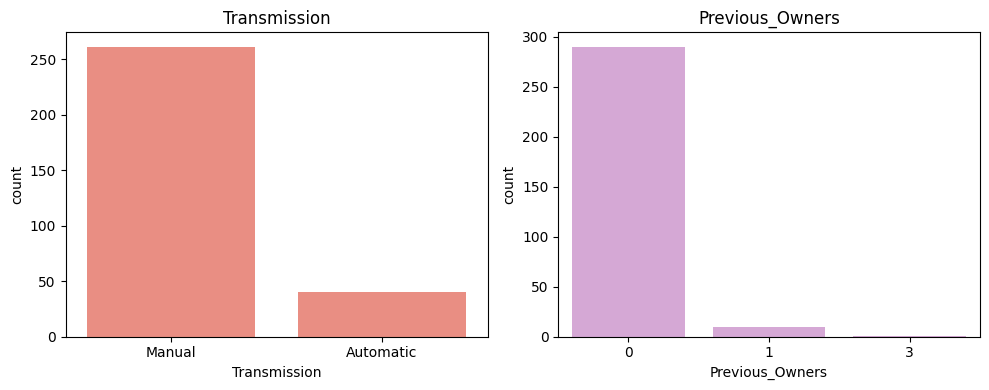

In [12]:
cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Previous_Owners']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i in range(0, len(cat_cols), 2):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df, color=colors[i])
    plt.title(cat_cols[i])

    if i + 1 < len(cat_cols):
        plt.subplot(1, 2, 2)
        sns.countplot(x=cat_cols[i+1], data=df, color=colors[i+1])
        plt.title(cat_cols[i+1])

    plt.tight_layout()
    plt.show()


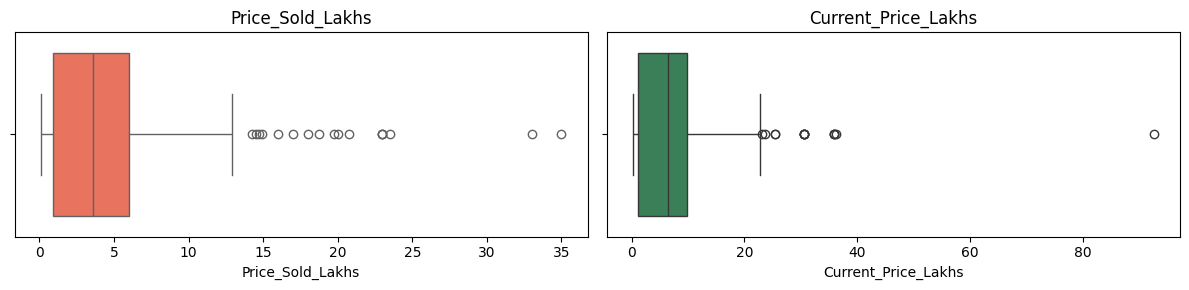

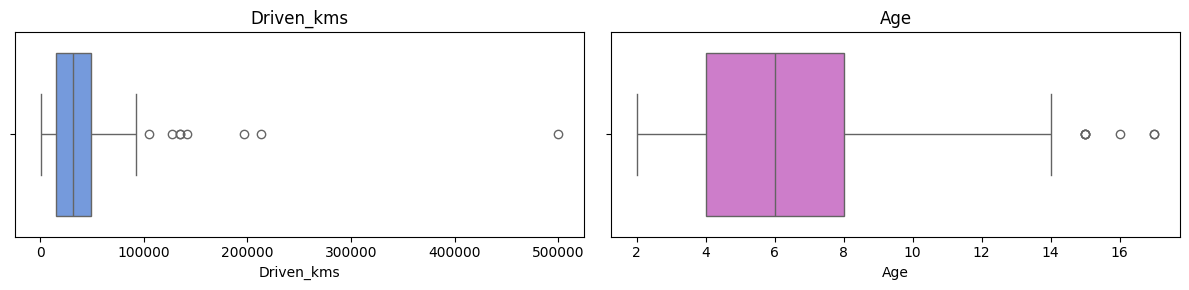

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Price_Sold_Lakhs', 'Current_Price_Lakhs', 'Driven_kms', 'Age']
colors = ['tomato', 'seagreen', 'cornflowerblue', 'orchid']

for i in range(0, len(num_cols), 2):
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[num_cols[i]], color=colors[i])
    plt.title(num_cols[i])

    if i + 1 < len(num_cols):
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[num_cols[i+1]], color=colors[i+1])
        plt.title(num_cols[i+1])

    plt.tight_layout()
    plt.show()


In [14]:
df[df['Price_Sold_Lakhs'] > df['Price_Sold_Lakhs'].quantile(0.99)]

,Car_Name,Price_Sold_Lakhs,Current_Price_Lakhs,Driven_kms,Fuel_Type,Selling_type,Transmission,Previous_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [15]:
df[df['Current_Price_Lakhs'] > df['Current_Price_Lakhs'].quantile(0.99)]

,Car_Name,Price_Sold_Lakhs,Current_Price_Lakhs,Driven_kms,Fuel_Type,Selling_type,Transmission,Previous_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [16]:
df[df['Driven_kms'] > df['Driven_kms'].quantile(0.99)]

,Car_Name,Price_Sold_Lakhs,Current_Price_Lakhs,Driven_kms,Fuel_Type,Selling_type,Transmission,Previous_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


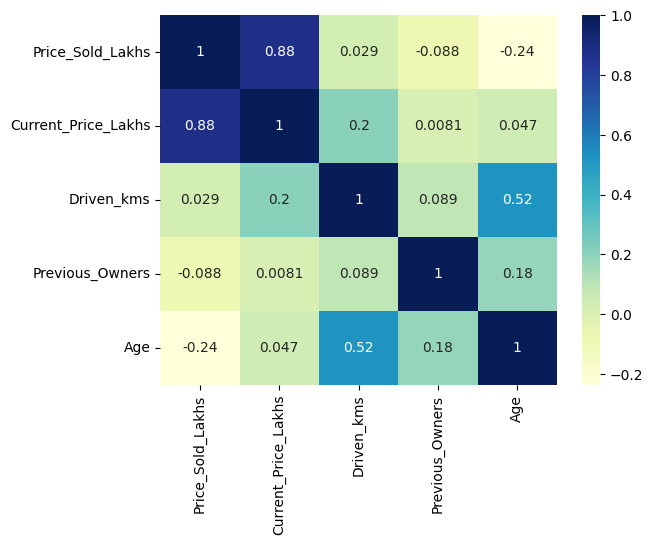

In [17]:
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

### **Data Preparation**

In [18]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [19]:
df.head()

,Price_Sold_Lakhs,Current_Price_Lakhs,Driven_kms,Fuel_Type,Selling_type,Transmission,Previous_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
df = pd.get_dummies(data = df,drop_first=True)

In [21]:
df.head()

,Price_Sold_Lakhs,Current_Price_Lakhs,Driven_kms,Previous_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


### **Train-Test Split**

In [22]:
y = df['Price_Sold_Lakhs']
X = df.drop('Price_Sold_Lakhs',axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


Model Creation

Applying regression models
* Linear Regression
* Ridge Regression
* Lasso Regression


In [25]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [26]:
cv_scores = []
train_r2 = []
test_r2 = []

def evaluate_model(model, name):
    model.fit(X_train, y_train)

    # R² scores
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_score = r2_score(y_train, pred_train)
    test_score = r2_score(y_test, pred_test)

    train_r2.append(round(train_score, 2))
    test_r2.append(round(test_score, 2))

    # Cross-validation
    cv = cross_val_score(model, X_train, y_train, cv=5)
    cv_scores.append(round(cv.mean(), 2))

    # Print results
    print(f"{name} - Train R2: {round(train_score, 2)}")
    print(f"{name} - Test R2: {round(test_score, 2)}")
    print(f"Cross-val scores: {cv}")
    print(f"Cross-val mean: {round(cv.mean(), 2)}")

    # Plots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].set_title("Train Residuals", color='darkblue')
    sns.kdeplot(y_train - pred_train, ax=axs[0], color='teal', fill=True)
    axs[0].set_xlabel("Residuals")

    axs[1].set_title("Test vs Predicted", color='darkgreen')
    axs[1].scatter(y_test, pred_test, color='orange', edgecolor='black')
    axs[1].set_xlabel("Actual")
    axs[1].set_ylabel("Predicted")

    plt.tight_layout()
    plt.show()


Linear_regressor.pkl - Train R2: 0.88
Linear_regressor.pkl - Test R2: 0.86
Cross-val scores: [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Cross-val mean: 0.84


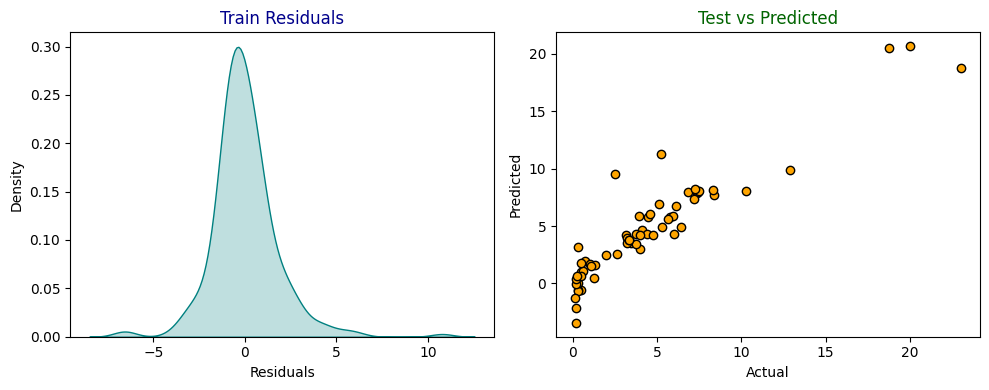

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
evaluate_model(lr,"Linear_regressor.pkl")

Ridge - Train R2: 0.88
Ridge - Test R2: 0.86
Cross-val scores: [0.89907549 0.89776791 0.82981785 0.81795705 0.73278673]
Cross-val mean: 0.84


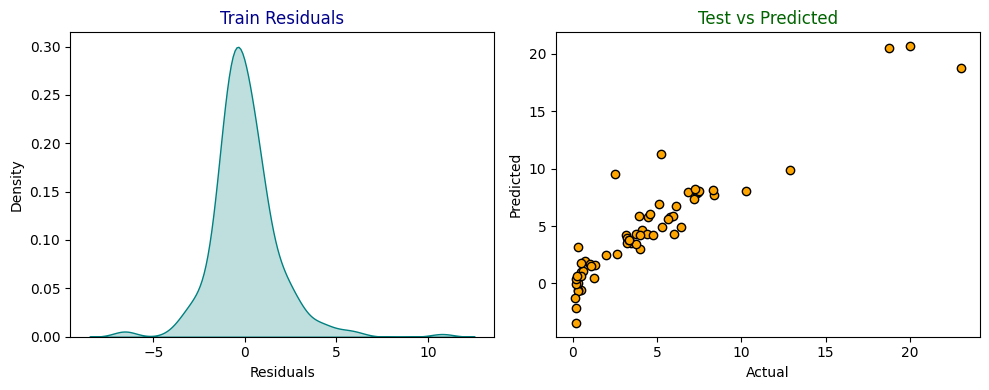

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


ridge = Ridge()
alpha_range = np.logspace(-3, 3, 14)


tuned_ridge = RandomizedSearchCV(ridge, param_distributions={'alpha': alpha_range})
evaluate_model(tuned_ridge, "Ridge")



In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Model and alpha values
lasso = Lasso()
alpha_vals = np.logspace(-3, 3, 14)


tuned_lasso = RandomizedSearchCV(lasso, param_distributions={'alpha': alpha_vals})


Lasso - Train R2: 0.88
Lasso - Test R2: 0.86
Cross-val scores: [0.89909444 0.89913326 0.83017798 0.81795538 0.70121811]
Cross-val mean: 0.83


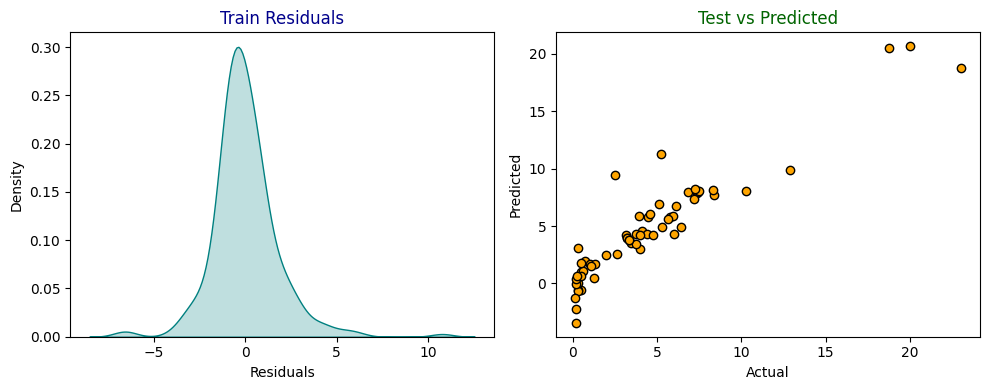

In [30]:
evaluate_model(tuned_lasso, "Lasso")


In [34]:
models = ["Linear Regression", "Ridge", "Lasso"]
summary = pd.DataFrame({
    'Model': models,
    'Train R²': train_r2[:3],
    'Test R²': test_r2[:3],
    'CV Mean Score': cv_scores[:3]
})
display(summary)


,Model,Train R²,Test R²,CV Mean Score
0,Linear Regression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
